'''
@Author: Samadhan Thube

@Date: 15-11-24

@Last modified by: Samadhan Thube

@Last modified Date: 15-11-24 

@Title: Logistic Regression 

'''

Importing Libraries

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from scipy import stats

Load Dataset

In [306]:
df = pd.read_csv('bank.csv', delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


Checking for null values

In [307]:
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Plot box plots to check outliers

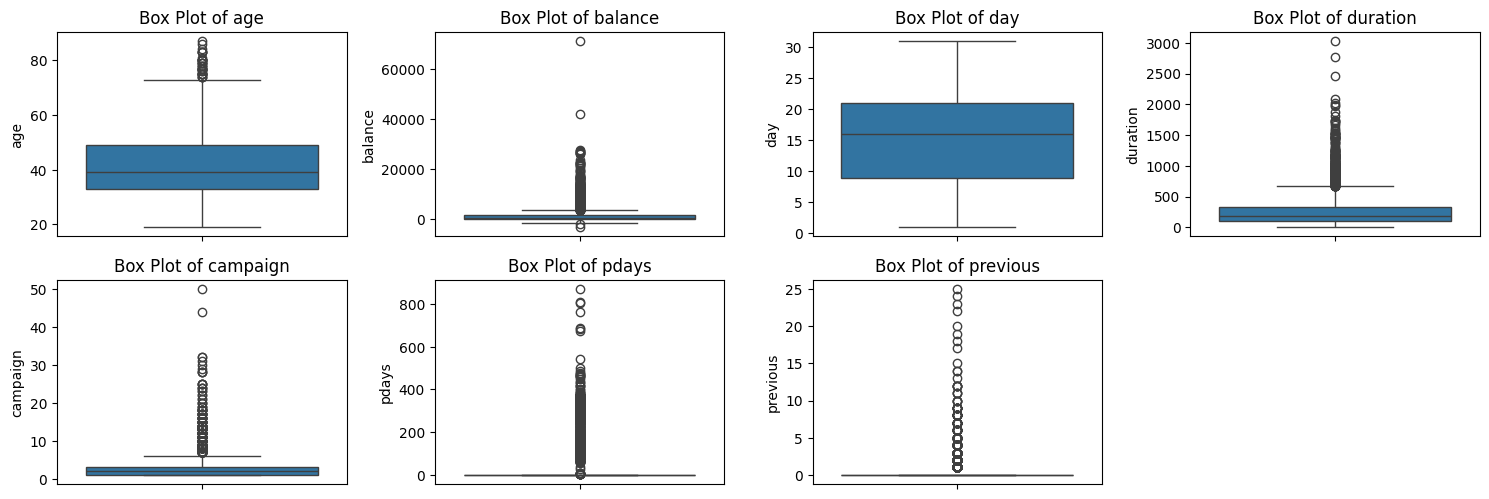

In [308]:
# Select only numerical columns
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Visualizing the initial data with box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Removing outliers using IQR

In [ ]:
Q1 = df[num_columns].quantile(0.25)
Q3 = df[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Filtering the data to remove outliers
df_filtered = df[~((df[num_columns] < (Q1 - 1.5 * IQR)) | (df[num_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {df.shape}')
print(f'Filtered data shape: {df_filtered.shape}')

Original data shape: (4521, 17)
Filtered data shape: (2803, 17)


Plot box plots after outlier removal

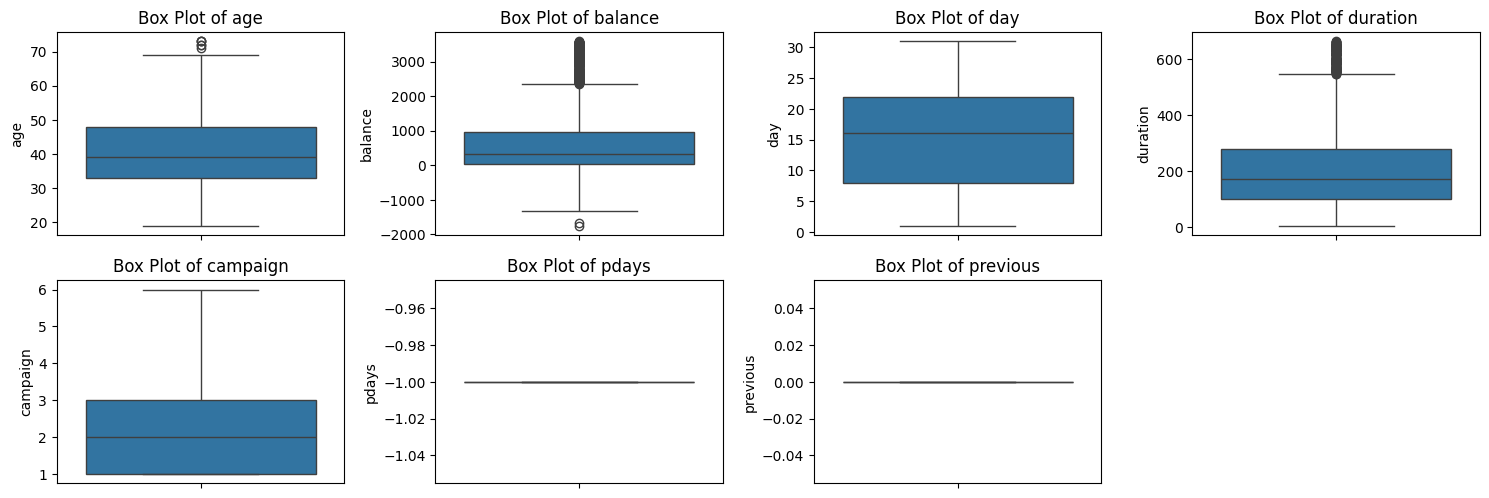

In [311]:
# Select only numerical columns
num_columns = df_filtered.select_dtypes(include=[np.number]).columns.tolist()

# Visualizing the initial data with box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

Encoding categorical variables

In [ ]:
label_encoders = {}
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for column in categorical_columns:
    le = LabelEncoder()
    df_filtered.loc[:, column] = le.fit_transform(df_filtered[column])  # Using .loc to avoid SettingWithCopyWarning
    label_encoders[column] = le  # Store the encoder for potential inverse transformation later

In [317]:
# Encoding the target variable 'y' and keeping only numerical features
y = df_filtered['y'].map({'yes': 1, 'no': 0})  # Target variable (convert to binary)
X = df_filtered.drop(columns=['y'])  # Drop the target variable column
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,0
7,39,9,1,1,0,147,1,0,0,6,8,151,2,-1,0,0
8,41,2,1,2,0,221,1,0,2,14,8,57,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,36,9,0,1,0,566,1,0,2,20,8,129,2,-1,0,0
4512,40,1,1,1,0,1100,1,0,2,29,8,660,2,-1,0,0
4513,49,1,1,1,0,322,0,0,0,14,1,356,2,-1,0,0
4515,32,7,2,1,0,473,1,0,0,7,5,624,5,-1,0,0


Removing unnecessary columns

In [319]:
X = X.drop(['pdays', 'previous','poutcome'], axis=1)
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,30,10,1,0,0,1787,0,0,0,19,10,79,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4
4,59,1,1,1,0,0,1,0,2,5,8,226,1
7,39,9,1,1,0,147,1,0,0,6,8,151,2
8,41,2,1,2,0,221,1,0,2,14,8,57,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,36,9,0,1,0,566,1,0,2,20,8,129,2
4512,40,1,1,1,0,1100,1,0,2,29,8,660,2
4513,49,1,1,1,0,322,0,0,0,14,1,356,2
4515,32,7,2,1,0,473,1,0,0,7,5,624,5


Plotting Heatmap

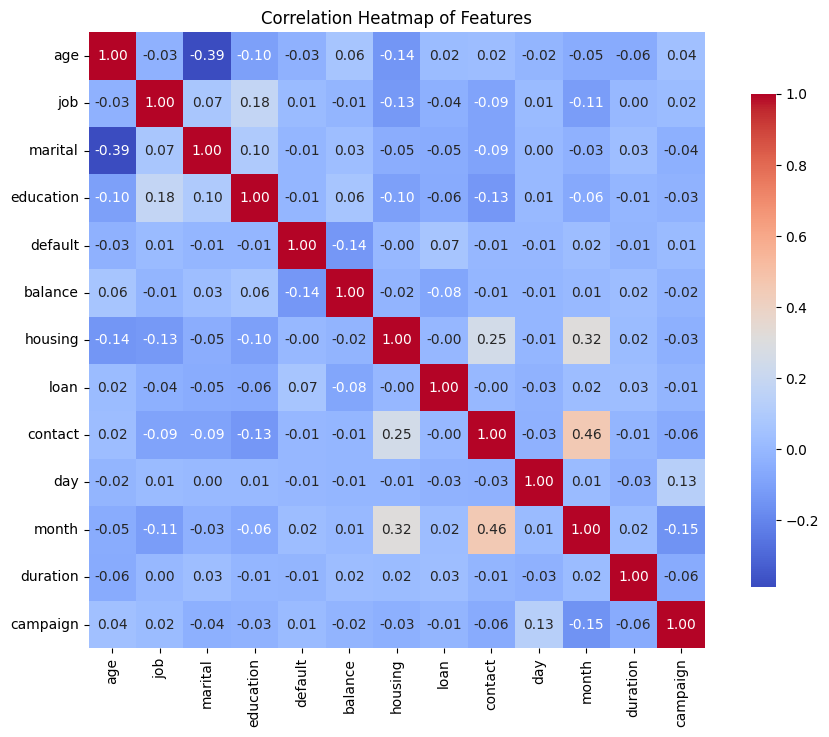

In [320]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()

Splitting

In [321]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scalling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Model Selection

In [323]:

# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

Model Evalution

In [324]:

# Evaluating the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.9554367201426025
Confusion Matrix:
 [[532   1]
 [ 24   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       533
           1       0.80      0.14      0.24        28

    accuracy                           0.96       561
   macro avg       0.88      0.57      0.61       561
weighted avg       0.95      0.96      0.94       561



Visualizing the Confusion Matrix

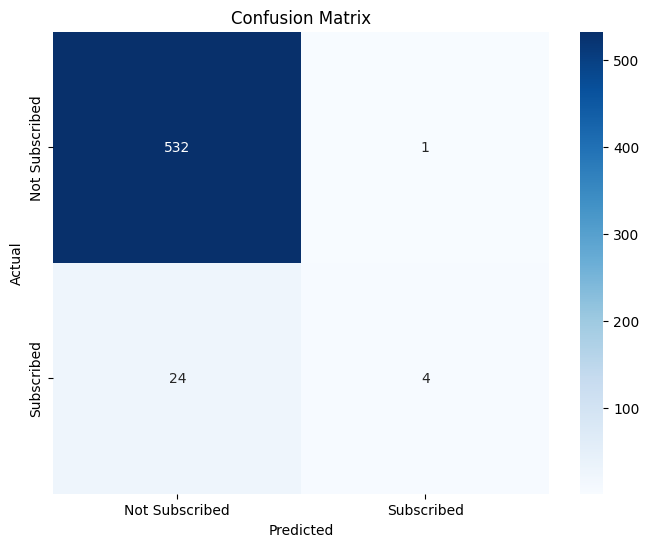

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()